# Problem Statement-
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


# Solution

In [460]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [461]:
data=pd.read_csv("crime_data.csv")

In [696]:
data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [463]:
cdata=data.rename(columns={'Unnamed: 0':'states'})

In [464]:
cdata.shape

(50, 5)

In [465]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [697]:
#normalization of the data
cndata=norm_func(cdata.iloc[:,1:])
cndata.head(3)

,Murder,Assault,UrbanPop,Rape,cluster_id
0,0.746988,0.654110,0.440678,0.359173,0.0
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,1.0


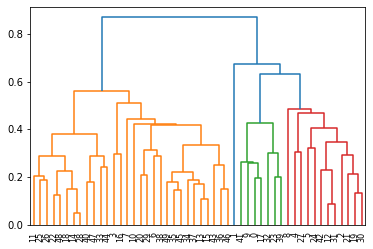

In [467]:
#create dendongram

dendogram=sch.dendrogram(sch.linkage(cndata,method='average'))


In [468]:
#creating model
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
cluster_id=hc.fit_predict(cndata)     
cluster_id

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [698]:
#creating a new column
cdata['cluster_id']=cluster_id
cdata.head(2)

,states,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0


In [470]:
#gouping by sattes which has same cluster id
state_cl=cdata.groupby(['cluster_id'])['states'].apply(lambda x:tuple(x))
state_cl

cluster_id
0    (Alabama, Alaska, Georgia, Louisiana, Mississi...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Arizona, California, Colorado, Florida, Illin...
Name: states, dtype: object

In [471]:
# Data under cluster 0
cluster0=cdata[cdata['states'].isin(state_cl[0])]
cluster0

,states,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [472]:
# Data under cluster 1
cluster1=cdata[cdata['states'].isin(state_cl[1])]
cluster1

,states,Murder,Assault,UrbanPop,Rape,cluster_id
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


In [473]:
# Data under cluster 2
cluster2=cdata[cdata['states'].isin(state_cl[2])]
cluster2

,states,Murder,Assault,UrbanPop,Rape,cluster_id
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [474]:
# Data under cluster 3
cluster3=cdata[cdata['states'].isin(state_cl[3])]
cluster3

,states,Murder,Assault,UrbanPop,Rape,cluster_id
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [475]:
cdata.groupby('cluster_id').agg(['mean','min','max'])

Murder                 Assault             UrbanPop          \
                 mean   min   max        mean  min  max       mean min max   
cluster_id                                                                   
0           14.087500  10.0  17.4  252.750000  188  337  53.500000  44  66   
1            5.715000   2.6   9.7  132.300000   46  238  70.800000  50  89   
2            3.180000   0.8   6.0   78.700000   45  120  49.300000  32  62   
3           10.883333   7.9  15.4  256.916667  178  335  78.333333  67  91   

               Rape              
               mean   min   max  
cluster_id                       
0           24.5375  16.1  44.5  
1           18.1000   8.3  29.3  
2           11.6300   7.3  16.5  
3           32.2500  24.0  46.0

# DBSCAN

In [476]:
from sklearn.metrics import silhouette_score as sil
from sklearn.cluster import DBSCAN

dbscan_data1=pd.read_csv("crime_data.csv")

In [477]:
dbscan_data=dbscan_data1.rename(columns={'Unnamed: 0':'states'})

In [478]:
dbscan_data

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Standrdizing data

In [646]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
array=std.fit_transform(dbscan_data.iloc[:,1:])
std_data=pd.DataFrame(array)
std_data

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,-1.077632
1,0.513019,1.118060,-1.224067,2.509424,-1.975658
2,0.072361,1.493817,1.009122,1.053466,-0.179605
3,0.234708,0.233212,-1.084492,-0.186794,0.718421
4,0.281093,1.275635,1.776781,2.088814,-1.975658
5,0.025976,0.402909,0.869548,1.883901,-1.975658
6,-1.040880,-0.736484,0.799761,-1.092723,0.718421
7,-0.437875,0.815030,0.450825,-0.585834,-1.975658
8,1.765415,1.990786,1.009122,1.150530,-1.975658
9,2.229265,0.487757,-0.386621,0.492653,-1.975658


In [647]:
# Finding minimum epsilon value by using nearest neighbour algorithm 

In [648]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(std_data)
distances, indices = neighbors_fit.kneighbors(std_data)
neighbors_fit

NearestNeighbors(n_neighbors=2)

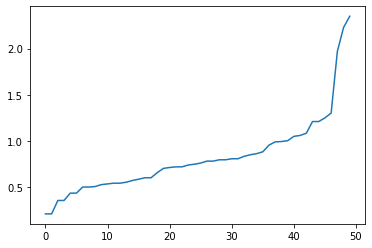

In [649]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [650]:
### Checking How cluster chages for the different value of epsilon 

In [668]:
my_range=[]
for j in range(0,2):
    for k in range(1,10):
        my_range.append(j+0.1)
for k in my_range:
    d=[]
    for l in range(2,11):
        clustering=DBSCAN(eps=k,min_samples=l)
        clustering.fit(df)
        clusterid=clustering.labels_
        cdf2=pd.DataFrame(clusterid)
        n=len(pd.unique(cdf2[0]))
        if(n==4 & l>3):
            break;
print(k,l)
        

1.1 4


#### From above function we found epsilon value=1.1 and minmum points=4

# Building a model with the epsilone value=1.1 minpoints=4

In [695]:
#craeting model object
clustering_fi=DBSCAN(eps=1.1,min_samples=4)
#training the model
clustering_fi.fit(df)
#getting cluster label
clusterid_fi=clustering_fi.labels_
#Getting label into data frame to find how many clusters got created
data_frame=pd.DataFrame(clusterid_fi)
no_clusters=len(pd.unique(data_frame[0]))
print("No Of Clusters got created -",no_clusters)

No Of Clusters got created - 4


### No. of clusters got created are 4

# Finding best no of clusters we can make  with Kmeans

In [670]:
std_data['y']=clusterid_fi

In [671]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
y=std_data['y']
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(std_data.iloc[:,0:5])
    sc_score.append(sil(std_data.iloc[:,0:5],y))

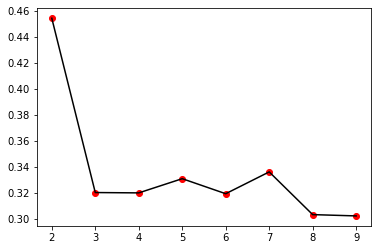

In [672]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")


plt.show()

### Observation
#### From above graph we can say that 3 or 4 no clusters we can make for this data
#### which matches to our model with epsilon value =1.1 ,minpoints= 4 no of clusters we created = 4 

In [675]:
dbscan_data['cluster_id']=clusterid_fi
states_gr=dbscan_data.groupby(['cluster_id'])['states'].apply(lambda y:tuple(y))
states_gr

In [681]:
cluster_db1=dbscan_data[dbscan_data['states'].isin(states_gr[0])]
cluster_db1

,states,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [683]:
cluster_db2=dbscan_data[dbscan_data['states'].isin(states_gr[1])]
cluster_db2

,states,Murder,Assault,UrbanPop,Rape,cluster_id
2,Arizona,8.1,294,80,31.0,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1
42,Texas,12.7,201,80,25.5,1


In [684]:
cluster_db2=dbscan_data[dbscan_data['states'].isin(states_gr[2])]
cluster_db2

,states,Murder,Assault,UrbanPop,Rape,cluster_id
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
20,Massachusetts,4.4,149,85,16.3,2


In [687]:
cluster_db2=dbscan_data[dbscan_data['states'].isin(states_gr[-1])]
cluster_db2

,states,Murder,Assault,UrbanPop,Rape,cluster_id
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
27,Nevada,12.2,252,81,46.0,-1


## Inference:
    We applied dbscan algorithm to crime data we with epsilone value=1.1 clusters 4(-1,0,1,2)
    here we can not say that -1 is outlier the data is about crime in formation of states 
   